# Laboration maskininlärning AI22

#### a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan, utan försök undersöka fler aspekter av datan.

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

df_movies = pd.read_csv("../data/ml-latest/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


df_movies.shape

In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [4]:
df_ratings = pd.read_csv("../data/ml-latest/ratings.csv")
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


In [5]:
df_ratings.shape

(33832162, 4)

In [6]:
df_ratings.info

<bound method DataFrame.info of           userId  movieId  rating   timestamp
0              1        1     4.0  1225734739
1              1      110     4.0  1225865086
2              1      158     4.0  1225733503
3              1      260     4.5  1225735204
4              1      356     5.0  1225735119
...          ...      ...     ...         ...
33832157  330975     8340     2.0  1091583256
33832158  330975     8493     2.5  1091585709
33832159  330975     8622     4.0  1091581777
33832160  330975     8665     3.0  1091581765
33832161  330975     8783     2.5  1091581799

[33832162 rows x 4 columns]>

#### b) Vilka är de 10 filmerna med flest ratings?

In [7]:
#top_10_ratings = df_ratings.groupby('movieId').agg({'rating': 'mean'}).sort_values(by='rating', ascending=False).head(10)
#print(top_10_ratings)
df_merged = pd.merge(df_ratings, df_movies, on='movieId')

top_10_ratings = df_merged.groupby('title').agg({'rating': 'mean'}).sort_values(by='rating', ascending=False).head(10)
print(top_10_ratings)

                                        rating
title                                         
Atelier Fontana (2011)                     5.0
The Clue to Love (2021)                    5.0
Fury: The Tales of Ronan Pierce (2014)     5.0
The Cathedral (2022)                       5.0
GORED (2015)                               5.0
The Two Firefighters (1968)                5.0
DC Noir (2019)                             5.0
Mangus! (2011)                             5.0
The Ultimate Legacy (2015)                 5.0
The Case of Unfaithful Klara (2009)        5.0


In [8]:
df_merged = pd.merge(df_ratings, df_movies, on='movieId')

#top_10_ratings = df_merged.groupby('title').agg({'rating': 'mean'}).sort_values(by='rating', ascending=False).head(10)
#print(top_10_ratings)

top_10_ratings = df_merged.groupby('movieId')['rating'].count().sort_values(ascending=False).head(10).reset_index().rename(columns={'rating': 'rating_count'})
print(top_10_ratings)

   movieId  rating_count
0      318        122296
1      356        113581
2      296        108756
3     2571        107056
4      593        101802
5      260         97202
6     2959         86207
7      527         84232
8      480         83026
9     1196         80200


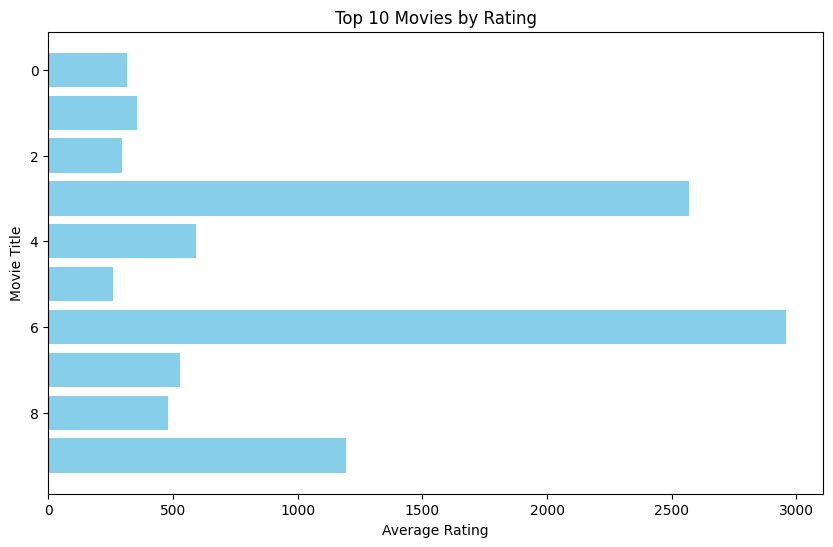

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_ratings.index, top_10_ratings['movieId'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Rating')
plt.gca().invert_yaxis()
plt.show()

#### d) Gör en plot över årtal och antalet filmer representerade i datasetet.

In [11]:
df_movies['year'] = df_movies['title'].str.extract(r'\((\d{4})\)$')
df_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),Action|Drama,2021
86533,288971,Ouija Japan (2021),Action|Horror,2021
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,1973
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller,2023


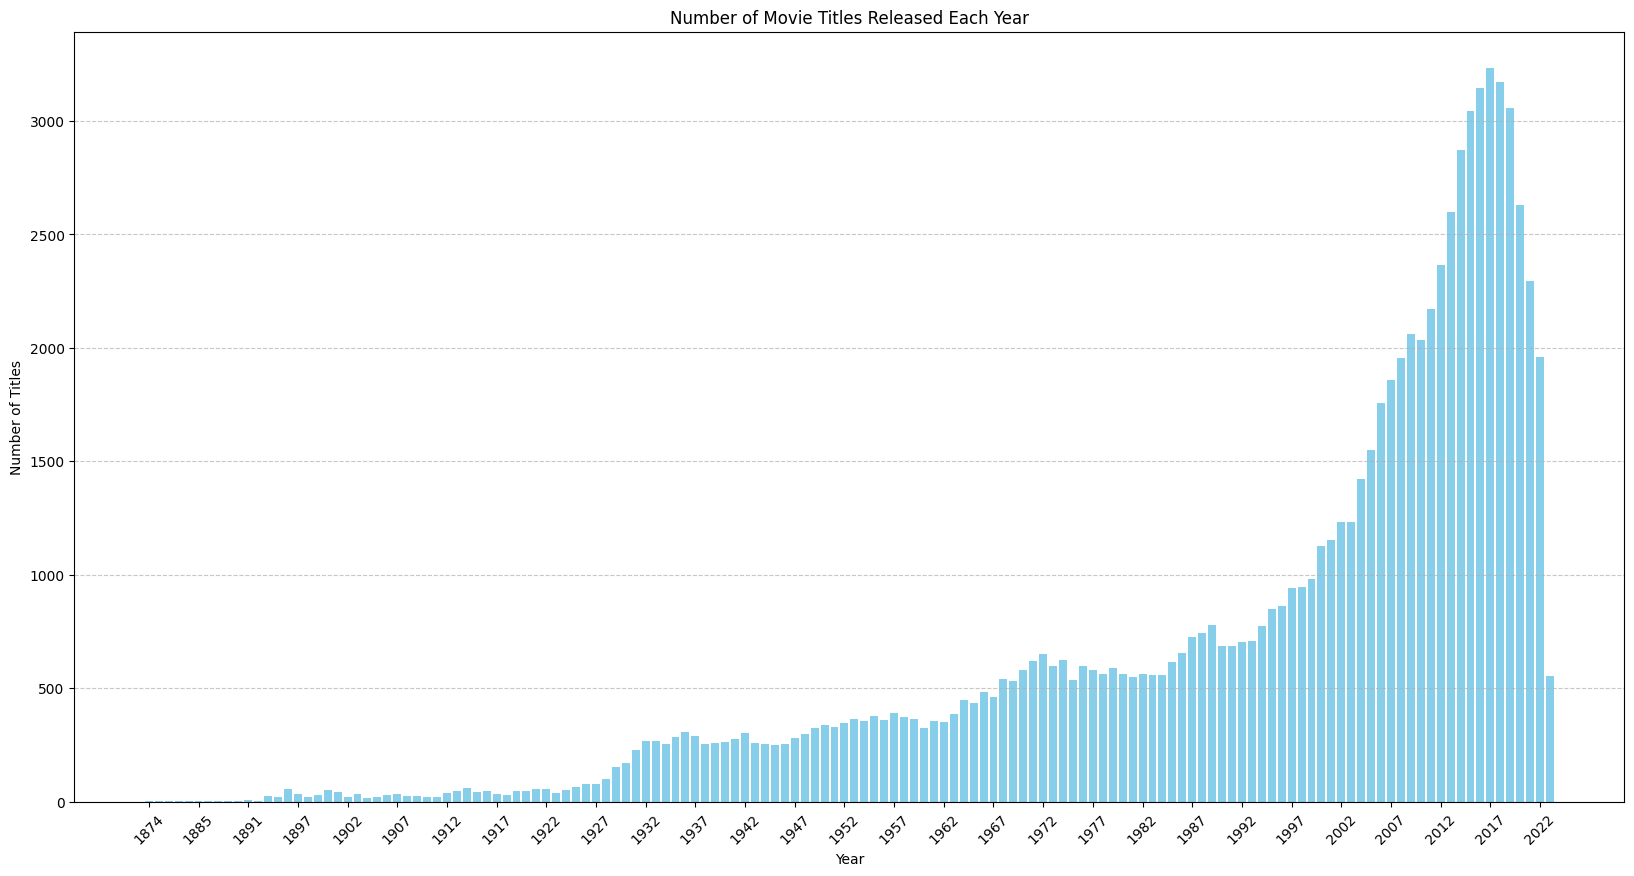

In [12]:
movies_per_year = df_movies.groupby('year')['title'].count()

plt.figure(figsize=(20, 10))
plt.bar(movies_per_year.index, movies_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.title('Number of Movie Titles Released Each Year')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(movies_per_year.index[::5], rotation=45)

plt.show()